## Introduction to Machine Learning ##  

### Lab Assignment 4: Classification Using Hand-Crafted Features and Neural Networks ###

In [1]:
# Lab assignment 4 foundation
# - Working with the VizWiz dataset

import os
import json
from pprint import pprint
import requests

base_url = 'https://ivc.ischool.utexas.edu/VizWiz/data'
img_dir = '%s/Images/' %base_url
print(img_dir)

https://ivc.ischool.utexas.edu/VizWiz/data/Images/


In [2]:
# Retrieve file from URL and store it locally
split = 'train'
trainFile = '%s/Annotations/%s.json' %(base_url, split)
trainData = requests.get(trainFile, allow_redirects=True)
print(trainFile)

https://ivc.ischool.utexas.edu/VizWiz/data/Annotations/train.json


In [38]:
split = 'test'
testFile = '%s/Annotations/%s.json' %(base_url, split)
testData = requests.get(testFile, allow_redirects=True)
print(testFile)

https://ivc.ischool.utexas.edu/VizWiz/data/Annotations/test.json


In [3]:
# Read the local file
numTrainVQs = 4
trainingData = trainData.json()
for vq in trainingData[0:numTrainVQs]:
    image_name = vq['image']
    question = vq['question']
    label = vq['answerable']
    print(image_name)
    print(question)
    print(label)

VizWiz_train_000000000000.jpg
What's the name of this product?
1
VizWiz_train_000000000001.jpg
Can you tell me what is in this can please?
1
VizWiz_train_000000000002.jpg
Is this enchilada sauce or is this tomatoes?  Thank you.
1
VizWiz_train_000000000003.jpg
What is the captcha on this screenshot?
1


In [4]:
split = 'val'
valFile = '%s/Annotations/%s.json' %(base_url, split)
valData = requests.get(valFile, allow_redirects=True)
print(valFile)

https://ivc.ischool.utexas.edu/VizWiz/data/Annotations/val.json


In [5]:
numValVQs = 3
validationData = valData.json()
for vq in validationData[:numValVQs]:
    image_name = vq['image']
    question = vq['question']
    label = vq['answerable']
    print(image_name)
    print(question)
    print(label)

VizWiz_val_000000028000.jpg
What's this?
0
VizWiz_val_000000028001.jpg
What is this?
0
VizWiz_val_000000028002.jpg
What is this?
1


In [6]:
from skimage import io
from skimage.transform import resize
from skimage import color
from skimage import feature

def extract_image_features(image_url):
    
    # Read image
    image = io.imread(image_url)
    
    #Pre-process image
    width=255
    height = 255
    image = resize(image, (width, height)) # Ensuring all images have the same dimension
    greyscale_image = color.rgb2gray(image) # Restricting the dimension of our data from 3D to 2D
    
    # Extract features (skimage features)
    featureVector = feature.hog(greyscale_image, orientations=9, pixels_per_cell=(8,8), cells_per_block=(1,1))
    
    return featureVector
    

In [7]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yizhuoli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
import matplotlib.pyplot as plt

# read image from URL
def visualize_image(image_url):
    image = io.imread(image_url)
    print(image_url)
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    
num_vqs = 2
for vq in validationData[:num_vqs]:
    image_name = vq['image']
    image_url = img_dir + image_name
    visualize_image(image_url)

https://ivc.ischool.utexas.edu/VizWiz/data/Images/VizWiz_val_000000028000.jpg


<Figure size 640x480 with 1 Axes>

https://ivc.ischool.utexas.edu/VizWiz/data/Images/VizWiz_val_000000028001.jpg


<Figure size 640x480 with 1 Axes>

In [9]:
# Extract features to describe the questions
import nltk

def extract_language_features(question):
#     print(question)
    question = question.lower()
#     print(question)
    
    words = question.split()
    num_unique_words = len(set(words))
    num_words = len(words)
    
    partsOfSpeechTag = nltk.pos_tag(words)
    
#     tokenized_question = nltk.word_tokenize(question)
#     num_words = len()
    
    featureVector = [num_unique_words, num_words]
    
    return featureVector

In [10]:
import numpy as np
numVQs = 1
for vq in trainingData[:numVQs]:
    # question features
    question = vq['question']
    
    questionFeature = extract_language_features(question)
    print(np.array(questionFeature).shape)
    
    # Placeholder
    image_name = vq['image']
    image_url = img_dir + image_name
    image_feature = extract_image_features(image_url)
    print(image_feature[:5])
    print(image_feature.shape)
    
    # PLACEHOLDER: Concatenate the question and image features
    multimodal_features = np.concatenate((questionFeature, image_feature), axis=None)
    print(multimodal_features[:7])
    print(multimodal_features.shape)

(2,)
[0.20868969 0.07855178 0.00785362 0.00422292 0.49529085]
(8649,)
[6.00000000e+00 6.00000000e+00 2.08689685e-01 7.85517844e-02
 7.85361933e-03 4.22292086e-03 4.95290846e-01]
(8651,)


/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


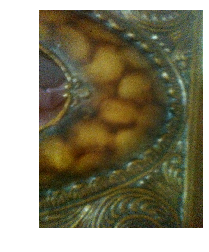

{'categories': [{'name': 'others_', 'score': 0.0078125}], 'adult': {'isAdultContent': False, 'isRacyContent': False, 'adultScore': 0.006206562742590904, 'racyScore': 0.008436331525444984}, 'color': {'dominantColorForeground': 'Brown', 'dominantColorBackground': 'Brown', 'dominantColors': ['Brown'], 'accentColor': 'A77124', 'isBwImg': False, 'isBWImg': False}, 'imageType': {'clipArtType': 0, 'lineDrawingType': 0}, 'tags': [{'name': 'bottle', 'confidence': 0.9831035137176514}, {'name': 'indoor', 'confidence': 0.9509612321853638}, {'name': 'food', 'confidence': 0.9509612321853638}, {'name': 'beer', 'confidence': 0.7235718351249667}, {'name': 'wine', 'confidence': 0.2801941393055822}], 'description': {'tags': ['bottle', 'indoor', 'table', 'sitting', 'wine', 'food', 'glass', 'plate', 'red', 'sandwich', 'laying', 'coffee', 'white'], 'captions': [{'text': 'a bottle of wine on a table', 'confidence': 0.7408009412153109}]}, 'faces': [], 'requestId': 'e6589aa7-76b3-48d3-80df-b9af809acdce', 'meta

In [11]:
import matplotlib.pyplot as plt
import requests
from skimage import io
%matplotlib inline

subscription_key_vision = ''
vision_api_url = 'https://centralus.api.cognitive.microsoft.com/vision/v1.0/analyze?'
img_url = 'https://ivc.ischool.utexas.edu/VizWiz/data/Images/VizWiz_val_000000028000.jpg'
params = {'visualfeatures': 'Description,Color,Tags,Categories,Faces,ImageType,Adult'}
data = {'url':image_url}

headers = {'Ocp-Apim-Subscription-Key': subscription_key_vision}
response = requests.post(vision_api_url, headers=headers, params=params, json=data)
description = response.json()

image = io.imread(img_url)
plt.imshow(image)
plt.axis('off')
plt.show()
print(description)

In [12]:
import json as js
print(js.dumps(description, sort_keys=True, indent=4, separators=(',', ': ')))

{
    "adult": {
        "adultScore": 0.006206562742590904,
        "isAdultContent": false,
        "isRacyContent": false,
        "racyScore": 0.008436331525444984
    },
    "categories": [
        {
            "name": "others_",
            "score": 0.0078125
        }
    ],
    "color": {
        "accentColor": "A77124",
        "dominantColorBackground": "Brown",
        "dominantColorForeground": "Brown",
        "dominantColors": [
            "Brown"
        ],
        "isBWImg": false,
        "isBwImg": false
    },
    "description": {
        "captions": [
            {
                "confidence": 0.7408009412153109,
                "text": "a bottle of wine on a table"
            }
        ],
        "tags": [
            "bottle",
            "indoor",
            "table",
            "sitting",
            "wine",
            "food",
            "glass",
            "plate",
            "red",
            "sandwich",
            "laying",
            "coffee",
  

In [13]:
description['color']

{'dominantColorForeground': 'Brown',
 'dominantColorBackground': 'Brown',
 'dominantColors': ['Brown'],
 'accentColor': 'A77124',
 'isBwImg': False,
 'isBWImg': False}

In [14]:
len(description['color'])

6

Personaly, I would like to assume that:  

1. if the score of the category is high, then it will be easier to ansiwer.
2. if the confidence of the description is higher then it will be better.
3. more tags will be more eaiser
4. the higher the highest tag's confidence, it will be easier.  

So, I will use the score of the category, the confidence of the description, the number of the tags and the tag's highest confidence to train the model.

In [15]:
# get the score of the category, the confidence of the description, 
# the number of the tags and the tag's highest confidence
score = description['categories'][0]['score']
numOfTags = len(description['description']['tags'])
conOfDes = description['description']['captions'][0]['confidence']
tagCon = description['tags'][0]['confidence']

Now we can get the data we want, we need to get all the data we want.  
use for loop to access all the picture and then sort all the data in a list.
for future use, we will save all the description in a list.

In [16]:
# Read the local file
score_list = []
numOfTags_list = []
conOfDes_list = []
tagCon_list = []
description_list = []
name_list = []

error_list = []

numTrainVQs = 100
trainingData = trainData.json()
params = {'visualfeatures': 'Description,Color,Tags,Categories,Faces,ImageType,Adult'}
for vq in trainingData[0:numTrainVQs]:
    image_name = vq['image']
    try:
        question = vq['question']
        label = vq['answerable']

        img_url = img_dir+image_name
        data = {'url':img_url}
        response = requests.post(vision_api_url, headers=headers, params=params, json=data)
        description = response.json()

        score = description['categories'][0]['score']
        numOfTags = len(description['description']['tags'])
        conOfDes = description['description']['captions'][0]['confidence']
        tagCon = description['tags'][0]['confidence']
        
        score_list.append(score)
        numOfTags_list.append(numOfTags)
        conOfDes_list.append(conOfDes)
        tagCon_list.append(tagCon)
        description_list.append(description)
        name_list.append(image_name)
        
    except:
        error_list.append(image_name)

In [17]:
print(len(score_list))
print(len(numOfTags_list))
print(len(conOfDes_list))
print(len(tagCon_list))
print(len(description_list))

85
85
85
85
85


In [18]:
error_list

['VizWiz_train_000000000004.jpg',
 'VizWiz_train_000000000005.jpg',
 'VizWiz_train_000000000008.jpg',
 'VizWiz_train_000000000016.jpg',
 'VizWiz_train_000000000017.jpg',
 'VizWiz_train_000000000022.jpg',
 'VizWiz_train_000000000036.jpg',
 'VizWiz_train_000000000056.jpg',
 'VizWiz_train_000000000069.jpg',
 'VizWiz_train_000000000071.jpg',
 'VizWiz_train_000000000075.jpg',
 'VizWiz_train_000000000076.jpg',
 'VizWiz_train_000000000091.jpg',
 'VizWiz_train_000000000096.jpg',
 'VizWiz_train_000000000097.jpg']

In [19]:
import tqdm

numTrainVQs = 3000
trainingData = trainData.json()
params = {'visualfeatures': 'Description,Color,Tags,Categories,Faces,ImageType,Adult'}
for vq in tqdm.tqdm(trainingData[100:numTrainVQs]):
    image_name = vq['image']
    try:
        question = vq['question']
        label = vq['answerable']

        img_url = img_dir+image_name
        data = {'url':img_url}
        response = requests.post(vision_api_url, headers=headers, params=params, json=data)
        description = response.json()

        score = description['categories'][0]['score']
        numOfTags = len(description['description']['tags'])
        conOfDes = description['description']['captions'][0]['confidence']
        tagCon = description['tags'][0]['confidence']
        
        score_list.append(score)
        numOfTags_list.append(numOfTags)
        conOfDes_list.append(conOfDes)
        tagCon_list.append(tagCon)
        description_list.append(description)
        name_list.append(image_name)
        
    except:
        error_list.append(image_name)

100%|██████████| 2900/2900 [2:05:35<00:00,  3.40s/it]    


In [20]:
print(len(score_list))
print(len(numOfTags_list))
print(len(conOfDes_list))
print(len(tagCon_list))
print(len(description_list))
print(len(name_list))

2445
2445
2445
2445
2445
2445


In [21]:
# forget to put the label and the question in the list, so we need to do the for loop again.
question_list = []
label_list = []

for vq in tqdm.tqdm(trainingData[0:numTrainVQs]):
    image_name = vq['image']
    if image_name not in error_list:
        question = vq['question']
        label = vq['answerable']
        
        question_list.append(question)
        label_list.append(label)

print(len(question_list))
print(len(label_list))

100%|██████████| 3000/3000 [00:00<00:00, 62159.63it/s]

2445
2445


In [24]:
# make the data into dataframe
import pandas as pd

trainData = {"name":name_list, "categoriesScore":score_list, "numOfTags":numOfTags_list, 
        "conOfDes":conOfDes_list, "tagCon":tagCon_list, "label":label_list}
column_name = ['name', 'categoriesScore', 'numOfTags', 'conOfDes', 'tagCon', 'label']

trainData_df = pd.DataFrame(trainData, columns=column_name)

In [25]:
trainData_df.head()

,name,categoriesScore,numOfTags,conOfDes,tagCon,label
0,VizWiz_train_000000000000.jpg,0.007812,13,0.740801,0.983104,1
1,VizWiz_train_000000000001.jpg,0.289062,23,0.260836,0.991428,1
2,VizWiz_train_000000000002.jpg,0.019531,13,0.745821,0.417522,1
3,VizWiz_train_000000000003.jpg,0.023438,2,0.957625,0.999197,1
4,VizWiz_train_000000000006.jpg,0.003906,11,0.746603,0.974059,1


In [27]:
trainData_df.to_csv('trainning_data.csv')

In [31]:
# For future use of the description, save the description
descriptionData = {"name":name_list, "description":description_list}
description_df = pd.DataFrame(descriptionData, columns=['name','description'])
description_df.head()

,name,description
0,VizWiz_train_000000000000.jpg,"{'categories': [{'name': 'others_', 'score': 0..."
1,VizWiz_train_000000000001.jpg,"{'categories': [{'name': 'others_', 'score': 0..."
2,VizWiz_train_000000000002.jpg,"{'categories': [{'name': 'others_', 'score': 0..."
3,VizWiz_train_000000000003.jpg,"{'categories': [{'name': 'others_', 'score': 0..."
4,VizWiz_train_000000000006.jpg,"{'categories': [{'name': 'others_', 'score': 0..."


In [32]:
description_df.to_csv('description_data.csv')

In [35]:
trainData_df = trainData_df.set_index('name')
trainData_df.head()

,categoriesScore,numOfTags,conOfDes,tagCon,label
name,,,,,
VizWiz_train_000000000000.jpg,0.007812,13,0.740801,0.983104,1
VizWiz_train_000000000001.jpg,0.289062,23,0.260836,0.991428,1
VizWiz_train_000000000002.jpg,0.019531,13,0.745821,0.417522,1
VizWiz_train_000000000003.jpg,0.023438,2,0.957625,0.999197,1
VizWiz_train_000000000006.jpg,0.003906,11,0.746603,0.974059,1


In [36]:
# Now we begin to split the trainning dataset and build the model to predict
# spliting training set into 80/20 training and validation set
from sklearn.model_selection import train_test_split

train_features = trainData_df.drop(['label'],axis=1)
train_target = trainData_df['label']

X_train, X_test,y_train,y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1956, 4) (489, 4) (1956,) (489,)


In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)
accuracy = svm_clf.score(X_test, y_test)
accuracy

0.7157464212678937

In [56]:
#train logistics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)
# y_pred = logreg.predict(X_test)

# print(accuracy_score(y_pred, y_test))

0.721881390593047

In [65]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
gauss.score(X_test, y_test)

0.6871165644171779

In [57]:
#Majority vote
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = LinearSVC()
eclf = VotingClassifier(estimators=[('lr',clf1),('gnb',clf2),('svm',clf3)], voting='hard')
scores = cross_val_score(eclf, X_train, y_train , cv=10)
scores.mean()

0.7116588173731031

In [58]:
#Bagging
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(clf1)
scores = cross_val_score(bagging, X_train, y_train, cv=10)
scores.mean()

0.7136996336996337

In [59]:
#Adaboost algorithm
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators = 1000)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.6687222715173025

In [62]:
# Instantiate Perceptron
from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=0, max_iter=2)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.7177914110429447


Text(0.5, 1.0, 'Imapvt of Training')

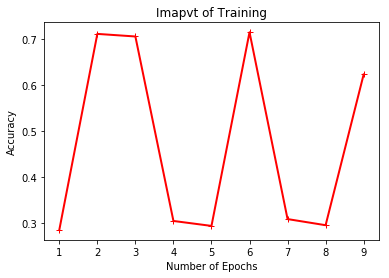

In [61]:
# Visualize impact of the number of training epochs on the prediction accuracy
import matplotlib.pyplot as plt

%matplotlib inline

startNumEpochs = 1
finishNumEpochs = 10
incrementAmt = 1
predScores = []
numEpochs = []
for epochCount in range(startNumEpochs, finishNumEpochs, incrementAmt):
    clf = Perceptron(random_state=0, max_iter=epochCount)
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    numEpochs.append(epochCount)
    predScores.append(score)
    
plt.plot(numEpochs, predScores, "r-+", linewidth=2)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Imapvt of Training")

In [70]:
# prediction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

model = GaussianNB()
model.fit(X_train_reduced, y_train)
model.score(X_test_reduced, y_test)

0.721881390593047

In [71]:
model = LogisticRegression()
model.fit(X_train_reduced, y_train)
model.score(X_test_reduced, y_test)

0.721881390593047

In [76]:
model = LinearSVC()
model.fit(X_train_reduced, y_train)
model.score(X_test_reduced, y_test)

0.721881390593047

In [73]:
# standardization
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc = stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

In [74]:
model = LogisticRegression()
model.fit(X_train_std, y_train)
model.score(X_test_std, y_test)

0.721881390593047

In [75]:
model = GaussianNB()
model.fit(X_train_std, y_train)
model.score(X_test_std, y_test)

0.6871165644171779

In [77]:
model = LinearSVC()
model.fit(X_train_std, y_train)
model.score(X_test_std, y_test)

0.721881390593047

In [41]:
# get the test data set
test_score_list = []
test_numOfTags_list = []
test_conOfDes_list = []
test_tagCon_list = []
test_description_list = []
test_name_list = []
test_question_list = []
test_label_list = []
test_error_list = []

numTestVQs = 200
testingData = testData.json()
params = {'visualfeatures': 'Description,Color,Tags,Categories,ImageType'}
for vq in tqdm.tqdm(testingData[100:numTestVQs]):
    image_name = vq['image']
    try:
        question = vq['question']

        img_url = img_dir+image_name
        data = {'url':img_url}
        response = requests.post(vision_api_url, headers=headers, params=params, json=data)
        description = response.json()

        score = description['categories'][0]['score']
        numOfTags = len(description['description']['tags'])
        conOfDes = description['description']['captions'][0]['confidence']
        tagCon = description['tags'][0]['confidence']

        test_score_list.append(score)
        test_numOfTags_list.append(numOfTags)
        test_conOfDes_list.append(conOfDes)
        test_tagCon_list.append(tagCon)
        test_description_list.append(description)
        test_name_list.append(image_name)
        test_question_list.append(question)
        
    except:
        test_error_list.append(image_name)

100%|██████████| 100/100 [02:18<00:00,  1.28s/it]


In [53]:
test_error_list

['VizWiz_test_000000020100.jpg',
 'VizWiz_test_000000020109.jpg',
 'VizWiz_test_000000020120.jpg',
 'VizWiz_test_000000020122.jpg',
 'VizWiz_test_000000020131.jpg',
 'VizWiz_test_000000020136.jpg',
 'VizWiz_test_000000020142.jpg',
 'VizWiz_test_000000020145.jpg',
 'VizWiz_test_000000020148.jpg',
 'VizWiz_test_000000020155.jpg',
 'VizWiz_test_000000020160.jpg',
 'VizWiz_test_000000020163.jpg',
 'VizWiz_test_000000020187.jpg',
 'VizWiz_test_000000020191.jpg',
 'VizWiz_test_000000020195.jpg']

In [78]:
test_description_list = []
test_question_list = []
test_name_list = []

numTestVQs = 200
testingData = testData.json()
params = {'visualfeatures': 'Description,Color,Tags,Categories,ImageType'}
for vq in tqdm.tqdm(testingData[100:numTestVQs]):
    
    image_name = vq['image']
    test_name_list.append(image_name)
    question = vq['question']
    test_question_list.append(question)

    img_url = img_dir+image_name
    data = {'url':img_url}
    response = requests.post(vision_api_url, headers=headers, params=params, json=data)
    description = response.json()
    test_description_list.append(description)

100%|██████████| 100/100 [02:13<00:00,  1.34s/it]


In [80]:
# we have to get all the record, so we need to do something else.
descriptionData = {"name":test_name_list, "description":test_description_list}
description_df = pd.DataFrame(descriptionData, columns=['name','description'])
description_df.head()

,name,description
0,VizWiz_test_000000020100.jpg,"{'categories': [{'name': 'abstract_', 'score':..."
1,VizWiz_test_000000020101.jpg,"{'categories': [{'name': 'abstract_', 'score':..."
2,VizWiz_test_000000020102.jpg,"{'categories': [{'name': 'others_', 'score': 0..."
3,VizWiz_test_000000020103.jpg,"{'categories': [{'name': 'abstract_', 'score':..."
4,VizWiz_test_000000020104.jpg,"{'categories': [{'name': 'dark_light', 'score'..."


In [85]:
len(description_df)

100

In [92]:
test_score_list = []
test_numOfTags_list = []
test_conOfDes_list = []
test_tagCon_list = []

for index, description in description_df.iterrows():
    try:
        score = description['description']['categories'][0]['score']
    except:
        score = None
    try:
        numOfTags = len(description['description']['description']['tags'])
    except:
        numOfTags = None
    try:
        conOfDes = description['description']['description']['captions'][0]['confidence']
    except:
        conOfDes = None
    try:
        tagCon = description['description']['tags'][0]['confidence']
    except:
        tagCon = None

    test_score_list.append(score)
    test_numOfTags_list.append(numOfTags)
    test_conOfDes_list.append(conOfDes)
    test_tagCon_list.append(tagCon)

In [93]:
len(test_score_list)

100

In [98]:
# now we need to make all the testing data in a dataframe then suplement the missing data
# acturally I should do the same thing for the trainging data, 
# however, I skip the missing traing data which has the missing data
# and since it takes lots of time to run the Microsoft API again, I choose not to do that.
testData = {"name":test_name_list, "categoriesScore":test_score_list, "numOfTags":test_numOfTags_list, 
        "conOfDes":test_conOfDes_list, "tagCon":test_tagCon_list}
column_name = ['name', 'categoriesScore', 'numOfTags', 'conOfDes', 'tagCon']

testData_df = pd.DataFrame(testData, columns=column_name)
testData_df.head()

,name,categoriesScore,numOfTags,conOfDes,tagCon
0,VizWiz_test_000000020100.jpg,0.007812,14,NaN,0.991867
1,VizWiz_test_000000020101.jpg,0.078125,3,0.720613,0.298577
2,VizWiz_test_000000020102.jpg,0.003906,11,0.702244,0.943276
3,VizWiz_test_000000020103.jpg,0.011719,11,0.437640,0.132441
4,VizWiz_test_000000020104.jpg,0.285156,30,0.894849,0.999641


In [99]:
testData_df = testData_df.set_index('name')
testData_df.head()

,categoriesScore,numOfTags,conOfDes,tagCon
name,,,,
VizWiz_test_000000020100.jpg,0.007812,14,NaN,0.991867
VizWiz_test_000000020101.jpg,0.078125,3,0.720613,0.298577
VizWiz_test_000000020102.jpg,0.003906,11,0.702244,0.943276
VizWiz_test_000000020103.jpg,0.011719,11,0.437640,0.132441
VizWiz_test_000000020104.jpg,0.285156,30,0.894849,0.999641


In [100]:
from sklearn.preprocessing import Imputer 

imputer = Imputer(strategy='median')
imputer.fit(train_features)
imputer.statistics_

test_fixed = imputer.transform(testData_df)

In [103]:
# now use the best model to predict
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(test_fixed)

In [104]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

O My God, I should got that before see the result because there are several models have the same result. The reason of this may because of the imblace of the data.

Anyway, I will use this model. However, I think I have two ways to improve the performance of the prediction.  
1. use more data to train the model
2. use the balance data to train the model which means let the label 1 contains 50% of the trainning data.

In [107]:
import numpy

numpy.savetxt("result.csv", y_pred, delimiter=",")

#### Write 2-3 paragraphs describing your proposed prediction method. Describe the implementation of your proposed approach in such a way that a    ####
1) reader could reproduce your set-up and   
2) understand why you made your design decisions.

#### Write 2-3 paragraphs describing the analysis you conducted with the training and/or validation datasets that guided your choice for your prediction system design (e.g., hyperparameters, classification models, etc).####

The first step is to prepare the data.  
Then build and try different models. In this process, try some feature process like PCA and standardization.
Choose the best model.  
Get the test dataset. Predict with the best model.

In the first step, I choose four feature to make the prediction. Because:  
    
Personaly, I would like to assume that:  
if the score of the category is high, then it will be easier to ansiwer.  
if the confidence of the description is higher then it will be better.  
more tags will be more eaiser  
the higher the highest tag's confidence, it will be easier.  

So, I will use the score of the category, the confidence of the description, the number of the tags and the tag's highest confidence to train the model.

Then get the wanted data using Microsoft API and then save the data into a dataframe.  
Acturally, I should try more different features or get all the features and then use the greday method to choose the best features.  

Then I try different models, and get several model with the same result, which means there must be somethins wrong with my prediction. From the prediction result, we could see that all the result was predicted as 1. As I said above, it may because of the imbalance of the data and I could try two different ways:  

use more data to train the model  
use the balance data to train the model which means let the label 1 contains 50% of the trainning data.

I use the accuracy as the only judging criteria. So, I just chose the model with the highest accuracy which is the mdoel that predict all result as 1. The other function I could image is use the confusion matrix, to see the reacll ans the precision of the result. However, I think for this problem, accuracy is enough.

In [109]:
# Load dataset and split into train/test
from tensorflow.examples.tutorials.mnist import input_data

In [111]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(10,50), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.45142991
Iteration 2, loss = 0.22341461
Iteration 3, loss = 0.19756385
Iteration 4, loss = 0.18552423
Iteration 5, loss = 0.17541563
Iteration 6, loss = 0.16726054
Iteration 7, loss = 0.15808982
Iteration 8, loss = 0.15654622
Iteration 9, loss = 0.15063663
Iteration 10, loss = 0.14582655
Training set score: 0.958732
Test set score: 0.946143


In [120]:
def plotNeuronsAccuracy(hidden_layers=10, neurons=10):
    training_accuracy = []
    test_accuracy = []
    neurons_settings = range(10,100,10)
    for neurons in neurons_settings:
        # build the model
        mlp = MLPClassifier(hidden_layer_sizes=100, max_iter=neurons, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
        mlp.fit(X_train, y_train)
        # Record training set accuracy
        curTrainAccuracy = mlp.score(X_train, y_train)
        training_accuracy.append(curTrainAccuracy)
        # Record test set accuracy
        curTestAccuracy = mlp.score(X_test, y_test)
        test_accuracy.append(curTestAccuracy)
    plt.plot(neurons_settings, training_accuracy, label='Training accuracy')
    plt.plot(neurons_settings, test_accuracy, label='Test accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('max iter')
    plt.legend()

Iteration 1, loss = 0.30682385
Iteration 2, loss = 0.12595328
Iteration 3, loss = 0.08902409
Iteration 4, loss = 0.06938852
Iteration 5, loss = 0.05620847
Iteration 6, loss = 0.04785777
Iteration 7, loss = 0.03973063
Iteration 8, loss = 0.03356148
Iteration 9, loss = 0.02844355
Iteration 10, loss = 0.02503001
Iteration 1, loss = 0.30682385
Iteration 2, loss = 0.12595328
Iteration 3, loss = 0.08902409
Iteration 4, loss = 0.06938852
Iteration 5, loss = 0.05620847
Iteration 6, loss = 0.04785777
Iteration 7, loss = 0.03973063
Iteration 8, loss = 0.03356148
Iteration 9, loss = 0.02844355
Iteration 10, loss = 0.02503001
Iteration 11, loss = 0.02192181
Iteration 12, loss = 0.01788878
Iteration 13, loss = 0.01517539
Iteration 14, loss = 0.01304166
Iteration 15, loss = 0.01107030
Iteration 16, loss = 0.00936810
Iteration 17, loss = 0.00754326
Iteration 18, loss = 0.00661261
Iteration 19, loss = 0.00550325
Iteration 20, loss = 0.00493291
Iteration 1, loss = 0.30682385
Iteration 2, loss = 0.12595

Iteration 28, loss = 0.00216807
Iteration 29, loss = 0.00207178
Iteration 30, loss = 0.00193313
Iteration 31, loss = 0.00183402
Iteration 32, loss = 0.00177023
Iteration 33, loss = 0.00169157
Iteration 34, loss = 0.00163802
Iteration 35, loss = 0.00155253
Iteration 36, loss = 0.00150040
Iteration 37, loss = 0.00144313
Iteration 38, loss = 0.00140063
Iteration 39, loss = 0.00135866
Iteration 40, loss = 0.00130977
Iteration 41, loss = 0.00128123
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.30682385
Iteration 2, loss = 0.12595328
Iteration 3, loss = 0.08902409
Iteration 4, loss = 0.06938852
Iteration 5, loss = 0.05620847
Iteration 6, loss = 0.04785777
Iteration 7, loss = 0.03973063
Iteration 8, loss = 0.03356148
Iteration 9, loss = 0.02844355
Iteration 10, loss = 0.02503001
Iteration 11, loss = 0.02192181
Iteration 12, loss = 0.01788878
Iteration 13, loss = 0.01517539
Iteration 14, loss = 0.01304166
Iteration 15, loss = 0.

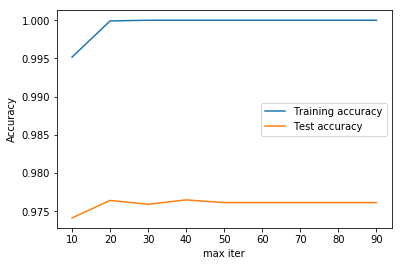

In [121]:
plotNeuronsAccuracy()

In [118]:
def plotLayerAccuracy(hidden_layers=10, neurons=10):
    training_accuracy = []
    test_accuracy = []
    hidden_layers_settings = range(10,100,10)
    for layer in hidden_layers_settings:
        # build the model
        mlp = MLPClassifier(hidden_layer_sizes=(layer,layer), max_iter=neurons, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
        mlp.fit(X_train, y_train)
        # Record training set accuracy
        curTrainAccuracy = mlp.score(X_train, y_train)
        training_accuracy.append(curTrainAccuracy)
        # Record test set accuracy
        curTestAccuracy = mlp.score(X_test, y_test)
        test_accuracy.append(curTestAccuracy)
    plt.plot(hidden_layers_settings, training_accuracy, label='Training accuracy')
    plt.plot(hidden_layers_settings, test_accuracy, label='Test accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('hidden layer sizes')
    plt.legend()

Iteration 1, loss = 0.55239873
Iteration 2, loss = 0.29763451
Iteration 3, loss = 0.25905111
Iteration 4, loss = 0.24407829
Iteration 5, loss = 0.23672355
Iteration 6, loss = 0.22830722
Iteration 7, loss = 0.22526489
Iteration 8, loss = 0.22084856
Iteration 9, loss = 0.21010208
Iteration 10, loss = 0.20330382
Iteration 1, loss = 0.39281364
Iteration 2, loss = 0.19780638
Iteration 3, loss = 0.16562716
Iteration 4, loss = 0.14735553
Iteration 5, loss = 0.13235842
Iteration 6, loss = 0.12833089
Iteration 7, loss = 0.12374324
Iteration 8, loss = 0.11661686
Iteration 9, loss = 0.11233551
Iteration 10, loss = 0.10858206
Iteration 1, loss = 0.33580994
Iteration 2, loss = 0.15692165
Iteration 3, loss = 0.12706821
Iteration 4, loss = 0.10839721
Iteration 5, loss = 0.09793430
Iteration 6, loss = 0.09124784
Iteration 7, loss = 0.08189440
Iteration 8, loss = 0.07784111
Iteration 9, loss = 0.07114371
Iteration 10, loss = 0.06744845
Iteration 1, loss = 0.32858298
Iteration 2, loss = 0.13500341
Itera

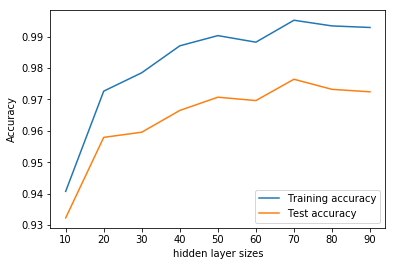

In [119]:
plotLayerAccuracy()

From the plot above, we could see that the optimal hidden layer sizes are 70 and max iter is 20.  
So, since we have four features in the first layer and one feature in the output. So, the weights of this model should be:  
4*20 + 20*20*(70-1) + 20*1 = 27700  
Number of bias is 20*50+1 = 1001  
Number of parameter is bias+weights = 28701
For each hyperparameter, I use 10 different numbers to do the test.

From the diagram above, I would like to say that with more hidden layers and more neurons, the model will perform better. Although this is not always true, when the hidden layers and the newrons are not too much, this is true.

This is easy to understand that with more hidder layers and more neurons, the model will calculate more times and better fit the trainning data. So, if the model is not over fitting, more layer and more neurons will help the model get better performance.

What's interesting is when the loss didn't reduce a lot, the model will stop iterating automatically. I think it a good way to same the compute resource and maybe a way to avoid the overfitting.